In [179]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [180]:
Loan_df = pd.read_csv("train.csv")

In [181]:
test_df=pd.read_csv("test.csv")

In [182]:
Loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [183]:
Loan_df.shape

(614, 13)

In [184]:
test_df.shape

(367, 12)

In [185]:
Loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [186]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [187]:
Loan_df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

It is observed that Gender,Married,Dependents,Self-Employed,LoanAmount,Loan_Amount_Term,Credit_History columns are having null values.

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [188]:
Loan_df['Gender'].fillna(Loan_df['Gender'].mode()[0], inplace=True) 
Loan_df['Married'].fillna(Loan_df['Married'].mode()[0], inplace=True) 
Loan_df['Dependents'].fillna(Loan_df['Dependents'].mode()[0], inplace=True) 
Loan_df['Self_Employed'].fillna(Loan_df['Self_Employed'].mode()[0], inplace=True) 
Loan_df['Credit_History'].fillna(Loan_df['Credit_History'].mode()[0], inplace=True)

In [189]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [190]:
Loan_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [191]:
Loan_df['Loan_Amount_Term'].fillna(Loan_df['Loan_Amount_Term'].mode()[0],inplace=True)

In [192]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [193]:
Loan_df['LoanAmount'].fillna(Loan_df['LoanAmount'].median(),inplace=True)

In [194]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [195]:
test_df['Gender'].fillna(Loan_df['Gender'].mode()[0], inplace=True) 
test_df['Dependents'].fillna(Loan_df['Dependents'].mode()[0], inplace=True) 
test_df['Self_Employed'].fillna(Loan_df['Self_Employed'].mode()[0], inplace=True) 
test_df['Credit_History'].fillna(Loan_df['Credit_History'].mode()[0], inplace=True) 
test_df['Loan_Amount_Term'].fillna(Loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(Loan_df['LoanAmount'].median(), inplace=True)

In [196]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## Understanding Distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4D049D1C8>,
      dtype=object)

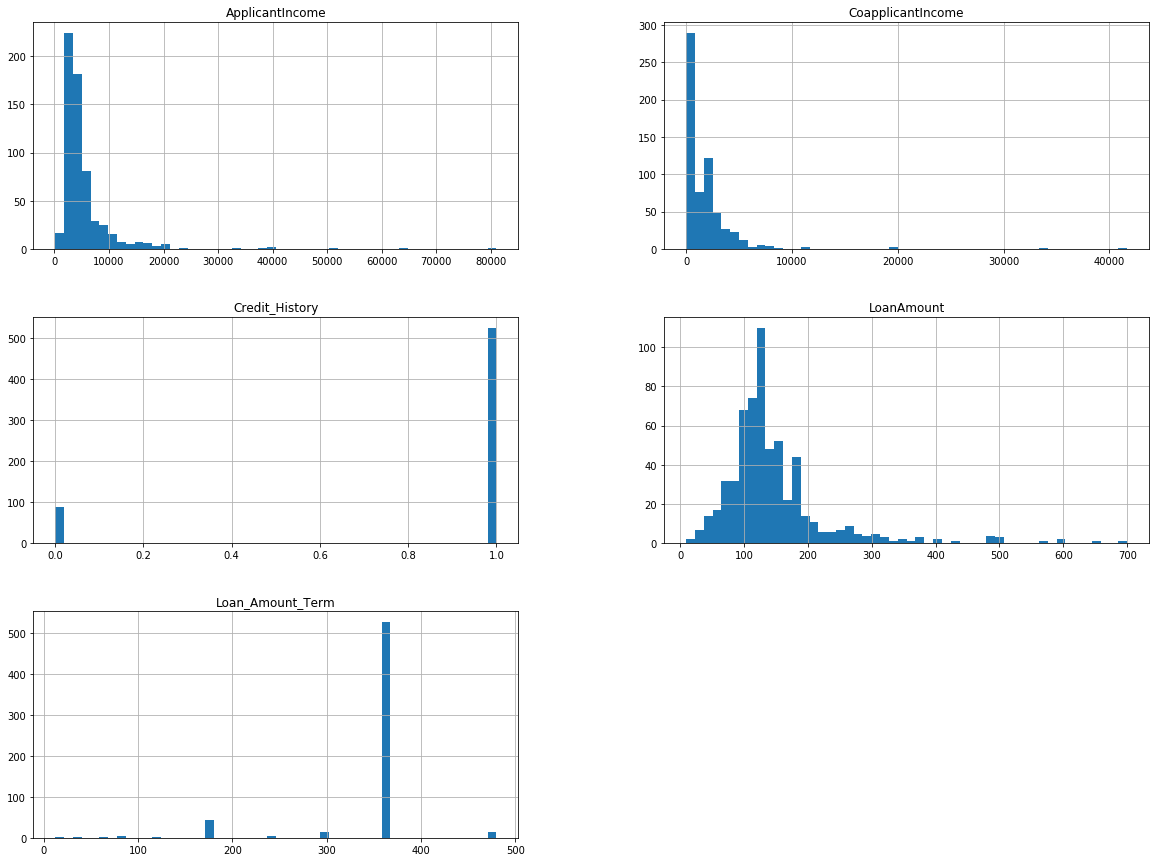

In [197]:
Loan_df.hist(bins=50,figsize=(20,15))

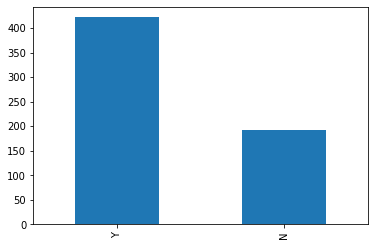

In [198]:
Loan_df['Loan_Status'].value_counts().plot.bar()

# Outlier Detection

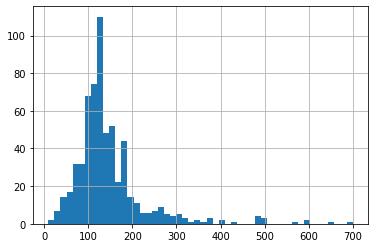

In [199]:
Loan_df['LoanAmount'].hist(bins=50)

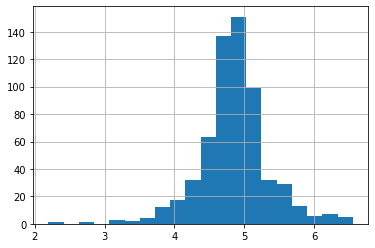

In [200]:
Loan_df['LoanAmount_log'] = np.log(Loan_df['LoanAmount'])
Loan_df['LoanAmount_log'].hist(bins=20)
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

# Model Building

In [201]:
Loan_df=Loan_df.drop('Loan_ID',axis=1)

In [202]:
Loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [203]:
test_df=test_df.drop('Loan_ID',axis=1)

In [204]:
features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [205]:
X=Loan_df[features].copy()

In [206]:
y=Loan_df[['Loan_Status']].copy()

In [207]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [208]:
y.columns

Index(['Loan_Status'], dtype='object')

In [209]:
nums = {"Gender":     {"Male": 0, "Female": 1},
        "Married": {"Yes": 1, "No": 0},
        "Education":{"Graduate":1,"Not Graduate":0},
        "Dependents":{"0":0,"1":1,"2":2,"3+":3},
        "Self_Employed":{"Yes":1,"No":0},
        "Property_Area":{"Urban":0,"Rural":1,"Semiurban":2}}
                                   
                   
                                                                                                                                                
       

In [210]:
X.replace(nums, inplace=True)


In [211]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0


In [212]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [214]:
type(X_train)






pandas.core.frame.DataFrame

In [215]:
type(X_test)

pandas.core.frame.DataFrame

In [216]:
type(y_train)

pandas.core.frame.DataFrame

In [217]:
type(y_test)

pandas.core.frame.DataFrame

In [218]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
134,0,0,0,1,0,4895,0.0,102.0,360.0,1.0,2
78,0,1,3,1,0,3167,4000.0,180.0,300.0,0.0,2
480,1,0,0,0,0,4350,0.0,154.0,360.0,1.0,1
17,1,0,0,1,0,3510,0.0,76.0,360.0,0.0,0
537,0,0,2,1,0,3617,0.0,107.0,360.0,1.0,2


In [219]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 134 to 507
Data columns (total 1 columns):
Loan_Status    411 non-null object
dtypes: object(1)
memory usage: 6.4+ KB


In [220]:
Eligibility_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
Eligibility_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [221]:
predictions = Eligibility_classifier.predict(X_test)

In [222]:
predictions[:10]

array(['Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N'], dtype=object)

In [223]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.7980295566502463